In [1]:
import pickle as pk
import numpy as np
import torch
from atom3d.util.metrics import auroc
from scipy.stats import pearsonr
from sklearn.utils.multiclass import type_of_target
import matplotlib.pyplot as plt

with open('test_preds.pkl', 'rb') as file:
    # Load the data from the pickle file
    test_preds = pk.load(file)


In [2]:
with open('data_msp.pk', 'rb') as file:
        full_dataset =  pk.load(file)
    
    # full_dataset = LMDBDataset('data/msp/raw/MSP/data/')
    # import pdb; pdb.set_trace()
    # full_dataset = [x for x in full_dataset if x.num_nodes < 1000]
    # print(len(full_dataset))
    #Convert the list of 0s and 1s target strings to integers and a torch tensor
for data in full_dataset:
    y = torch.tensor([int(label) for label in data.y]).float()
    data.y = y
    
# import pdb; pdb.set_trace()
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_set, val_set = torch.utils.data.random_split(full_dataset, [train_size, val_size])
test_targets = np.array([data.y for data in val_set])

/tmp/ipykernel_892003/4263916386.py:17: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  test_targets = np.array([data.y for data in val_set])
/tmp/ipykernel_892003/4263916386.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_targets = np.array([data.y for data in val_set])


In [3]:
test_targets = test_targets.astype(int)

In [4]:
test_preds

tensor([[0.0043],
        [0.0046],
        [0.0041],
        [0.0070],
        [0.0027],
        [0.0152],
        [0.0035],
        [0.0044],
        [0.0108],
        [0.0072],
        [0.0130],
        [0.0039],
        [0.0097],
        [0.0025],
        [0.0060],
        [0.0039],
        [0.0059],
        [0.0071],
        [0.0033],
        [0.0033],
        [0.0027],
        [0.0053],
        [0.0068],
        [0.0033],
        [0.0042],
        [0.0049],
        [0.0049],
        [0.0046],
        [0.0040],
        [0.0069],
        [0.0035],
        [0.0036],
        [0.0023],
        [0.0035],
        [0.0051],
        [0.0035],
        [0.0084],
        [0.0071],
        [0.0036],
        [0.0035],
        [0.0089],
        [0.0071],
        [0.0036],
        [0.0039],
        [0.0036],
        [0.0027],
        [0.0053],
        [0.0097],
        [0.0039],
        [0.0042],
        [0.0028],
        [0.0053],
        [0.0089],
        [0.0044],
        [0.0048],
        [0

In [5]:
def compute_accuracy(y_true, y_pred_probs, threshold=0.5):
    # Convert predicted probabilities to binary predictions
    y_pred_binary = (y_pred_probs > threshold).astype(int)
    print(y_pred_binary)
    print(y_true)
    # Compare binary predictions with true values
    correct_predictions = np.sum(y_pred_binary == y_true)

    # Compute accuracy
    accuracy = correct_predictions / len(y_true)
    
    return accuracy

In [6]:
test_auroc = auroc(test_targets, test_preds)
test_auroc

0.49609364689735264

In [7]:
test_targets.shape

(830,)

In [8]:
test_preds = test_preds.numpy()

In [9]:
test_preds = test_preds.reshape(830,)

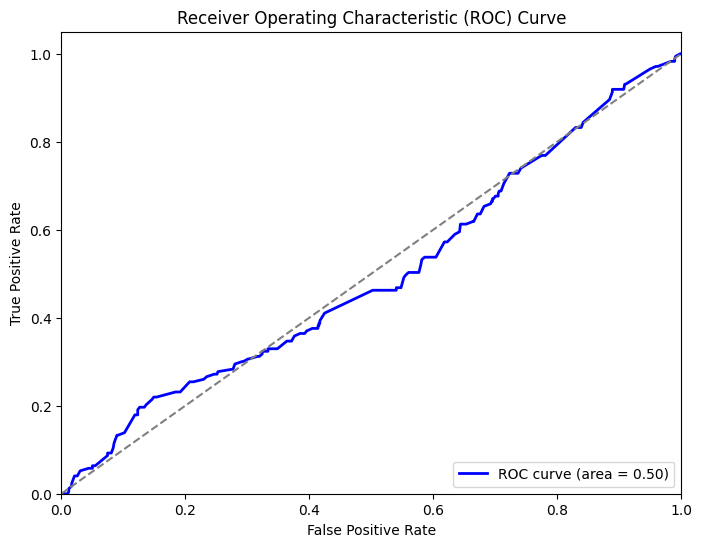

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'y_true' contains the true labels (0 or 1) and 'sigmoid_values' contains the predicted probabilities
fpr, tpr, thresholds = roc_curve(test_targets, test_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
test_targets

In [11]:
compute_accuracy(test_targets, test_preds)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

0.791566265060241